# Regressão Linear com NumPy

## Objetivos deste experimento

Este exemplo utiliza regressão linear para estimar o comprimento das sépalas da íris a partir do seu comprimento das pétalas.
Utiliza-se programação totalmente NumPy com:
- o **cálculo do gradiente**, 
- a **função de perda** e
- a atualização dos parâmetros são feitos de forma explícita.
- A rede é criada com uma camada como uma classe

<img src='https://raw.githubusercontent.com/robertoalotufo/files/master/figures/RegressaoLinear_Otimizacao.png' width='500'></a>

## Importação dos pacotes

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt   # para plotting

from sklearn.datasets import load_iris  # para carregar dataset

import numpy as np  # processamento matricial

np.random.seed(1234)

## Dataset

### Leitura dos dados

In [5]:
iris = load_iris()
data = iris.data[iris.target==1,::2]  # comprimento das sépalas e pétalas, indices 0 e 2

x_train = data[:,0:1]
y_train = data[:,1:2]

n_samples = x_train.shape[0]
print('x_train.shape:',x_train.shape, x_train.dtype)
print('y_train.shape:',y_train.shape, y_train.dtype)

print('x_train[:5]:\n', x_train[:5])
print('y_train[:5]:\n', y_train[:5])

x_train.shape: (50, 1) float64
y_train.shape: (50, 1) float64
x_train[:5]:
 [[7. ]
 [6.4]
 [6.9]
 [5.5]
 [6.5]]
y_train[:5]:
 [[4.7]
 [4.5]
 [4.9]
 [4. ]
 [4.6]]


In [6]:
out = [(x_i, y_i) for x_i, y_i in zip(x_train, y_train)]
out

[(array([7.]), array([4.7])),
 (array([6.4]), array([4.5])),
 (array([6.9]), array([4.9])),
 (array([5.5]), array([4.])),
 (array([6.5]), array([4.6])),
 (array([5.7]), array([4.5])),
 (array([6.3]), array([4.7])),
 (array([4.9]), array([3.3])),
 (array([6.6]), array([4.6])),
 (array([5.2]), array([3.9])),
 (array([5.]), array([3.5])),
 (array([5.9]), array([4.2])),
 (array([6.]), array([4.])),
 (array([6.1]), array([4.7])),
 (array([5.6]), array([3.6])),
 (array([6.7]), array([4.4])),
 (array([5.6]), array([4.5])),
 (array([5.8]), array([4.1])),
 (array([6.2]), array([4.5])),
 (array([5.6]), array([3.9])),
 (array([5.9]), array([4.8])),
 (array([6.1]), array([4.])),
 (array([6.3]), array([4.9])),
 (array([6.1]), array([4.7])),
 (array([6.4]), array([4.3])),
 (array([6.6]), array([4.4])),
 (array([6.8]), array([4.8])),
 (array([6.7]), array([5.])),
 (array([6.]), array([4.5])),
 (array([5.7]), array([3.5])),
 (array([5.5]), array([3.8])),
 (array([5.5]), array([3.7])),
 (array([5.8]), 

In [7]:
out = []
for x_i, y_i in zip(x_train, y_train):
  out.append((x_i, y_i))

In [8]:
np.concatenate([x_train, y_train], axis=1)

array([[7. , 4.7],
       [6.4, 4.5],
       [6.9, 4.9],
       [5.5, 4. ],
       [6.5, 4.6],
       [5.7, 4.5],
       [6.3, 4.7],
       [4.9, 3.3],
       [6.6, 4.6],
       [5.2, 3.9],
       [5. , 3.5],
       [5.9, 4.2],
       [6. , 4. ],
       [6.1, 4.7],
       [5.6, 3.6],
       [6.7, 4.4],
       [5.6, 4.5],
       [5.8, 4.1],
       [6.2, 4.5],
       [5.6, 3.9],
       [5.9, 4.8],
       [6.1, 4. ],
       [6.3, 4.9],
       [6.1, 4.7],
       [6.4, 4.3],
       [6.6, 4.4],
       [6.8, 4.8],
       [6.7, 5. ],
       [6. , 4.5],
       [5.7, 3.5],
       [5.5, 3.8],
       [5.5, 3.7],
       [5.8, 3.9],
       [6. , 5.1],
       [5.4, 4.5],
       [6. , 4.5],
       [6.7, 4.7],
       [6.3, 4.4],
       [5.6, 4.1],
       [5.5, 4. ],
       [5.5, 4.4],
       [6.1, 4.6],
       [5.8, 4. ],
       [5. , 3.3],
       [5.6, 4.2],
       [5.7, 4.2],
       [5.7, 4.2],
       [6.2, 4.3],
       [5.1, 3. ],
       [5.7, 4.1]])

### Normalização dos dados

In [9]:
xt_min = x_train.min()
xt_max = x_train.max()
x_train_n = (x_train - xt_min)/(xt_max - xt_min)

yt_min = y_train.min()
yt_max = y_train.max()
y_train_n = (y_train - yt_min)/(yt_max - yt_min)

Text(0, 0.5, 'Comprimento petalas')

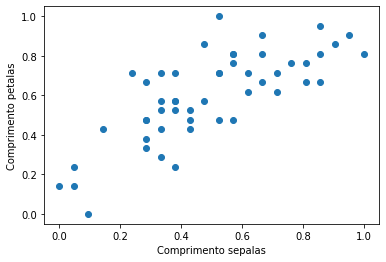

In [10]:
plt.scatter(x_train_n,y_train_n)
plt.xlabel('Comprimento sepalas')
plt.ylabel('Comprimento petalas')

## Modelo da rede

### Reta de ajuste

A equação da reta no plano necessita de dois parâmetros, aqui denominados $w_0$ (*bias*) e inclinação $w_1$. Veja figura:


<img src="https://raw.githubusercontent.com/robertoalotufo/files/master/figures/linhareta.png" width="300pt">

A reta de ajuste será dada por:

$$ \hat{y} = w_0 + w_1 x $$

onde 
* $w_1$ é o coeficiente angular da reta e 
* $w_0$ é a interseção do eixo vertical quando x é igual a zero, também denominado de *bias*.
* $x$ é a variável de entrada (comprimento das sépalas) e 
* $\hat{y}$ é a predição (comprimento estimado das pétalas).

### Linear Regression Model

<img src='https://raw.githubusercontent.com/robertoalotufo/files/master//figures/RegressaoLinearNeuronio.png' width='400'></a>

### Formulação matricial do neurônio

* $\mathbf{w} = [w_0 \ w_1]$ é vetor linha de parâmetros e 
* $\mathbf{x} = [1 \ x_0] $ é vetor linha de uma amostra (com *bias*).

$$ \hat{y} = 1 w_0 + x_0 w_1 $$

$$ [\hat{y}] = [1 \ x_0] \begin{bmatrix} w_0 \\ w_1 \end{bmatrix} $$

$$ \mathbf{\hat{y}} = \mathbf{x} \mathbf{w^T} $$

### Fazendo o predict de várias amostras

$$ \begin{matrix} 
\begin{bmatrix}
\hat{y}_0\\ 
\hat{y}_1\\
\\
\hat{y}_{M-1} 
\end{bmatrix} &=& \begin{bmatrix}
1 & x_0 \\ 
1 & x_1\\
\\ 
1 & x_{M-1} \\ 
\end{bmatrix}
&
\begin{bmatrix}
w_0\\ 
w_1
\end{bmatrix} \\
(M,1) & & (M,2) & (2,1) \\
\end{matrix} $$

### Preenchendo x com coluna de 1's para bias

In [11]:
x_train_bias = np.hstack([np.ones(shape=(n_samples,1)), x_train_n])

### Classe com o modelo da rede

In [12]:
class Net():
    def __init__(self, n_in, n_out):
        self.w = np.random.uniform(-0.1,0.1,(n_out,n_in)) #inicialização dos parâmetros
        print(f'w inicial: {self.w}')

    def forward(self, x_bias):
        return x_bias.dot(self.w.T)

### Criando a rede, instanciando o objeto model

In [13]:
model = Net(2,1) # duas entradas (1 + x0) e uma saída y_pred

w inicial: [[-0.06169611  0.02442175]]


### Testando o predict da rede (mesmo sem treiná-la)

In [14]:
xin = np.random.randn(4,2) # 4 amostras, 2 entradas (1 + x0)
ypred = model.forward(xin)
ypred

array([[-0.09602795],
       [ 0.0661236 ],
       [-0.06857828],
       [-0.05573871]])

## Treinamento via gradiente descendente

Função de perda:
$$ J(\hat{y_i},y_i) = \frac{1}{M} \sum_{i=0}^{M-1} (\hat{y_i} - y_i)^2 $$

Gradiente:
$$\mathbf{\nabla{J_w}} = \frac{2}{M}\mathbf{x^T}(\mathbf{x w^T} - \mathbf{y}) $$

Atualização dos parâmetros pelo gradiente descendente:
$$ \mathbf{w} = \mathbf{w} − \eta (\mathbf{\nabla J_w})^T $$

### Laço de treinamento

In [21]:
num_epochs = 1000
learning_rate = 0.001
model = Net(2,1) # duas entradas (1 + x0) e uma saída y_pred
for epoch in range(num_epochs):

    # forward - predict
    y_pred = model.forward(x_train_bias)

    #loss cálculo da função de perda
    loss = np.square(y_pred - y_train_n).mean()
    
    # cálculo do gradiente pelas derivadas parciais
    w_grad = (2.0/n_samples) * (x_train_bias.T).dot(x_train_bias.dot(model.w.T) - y_train_n)
    # gradiente descendente
    model.w = model.w - learning_rate * w_grad.T
    
    # verbose
    if (epoch+1) % 1 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss))

w inicial: [[ 0.00061663 -0.09724631]]
Epoch[1/1000], loss: 0.476608
Epoch[2/1000], loss: 0.474399
Epoch[3/1000], loss: 0.472202
Epoch[4/1000], loss: 0.470015
Epoch[5/1000], loss: 0.467839
Epoch[6/1000], loss: 0.465675
Epoch[7/1000], loss: 0.463521
Epoch[8/1000], loss: 0.461378
Epoch[9/1000], loss: 0.459245
Epoch[10/1000], loss: 0.457124
Epoch[11/1000], loss: 0.455013
Epoch[12/1000], loss: 0.452912
Epoch[13/1000], loss: 0.450822
Epoch[14/1000], loss: 0.448743
Epoch[15/1000], loss: 0.446673
Epoch[16/1000], loss: 0.444615
Epoch[17/1000], loss: 0.442566
Epoch[18/1000], loss: 0.440528
Epoch[19/1000], loss: 0.438500
Epoch[20/1000], loss: 0.436482
Epoch[21/1000], loss: 0.434475
Epoch[22/1000], loss: 0.432477
Epoch[23/1000], loss: 0.430490
Epoch[24/1000], loss: 0.428512
Epoch[25/1000], loss: 0.426544
Epoch[26/1000], loss: 0.424586
Epoch[27/1000], loss: 0.422638
Epoch[28/1000], loss: 0.420700
Epoch[29/1000], loss: 0.418771
Epoch[30/1000], loss: 0.416852
Epoch[31/1000], loss: 0.414943
Epoch[32/

## Avaliação

### Predict

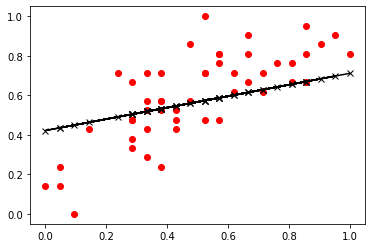

In [16]:
y_pred = model.forward(x_train_bias)
plt.plot(x_train_n, y_train_n, 'ro', label='Original data')
plt.plot(x_train_n, y_pred, 'kx-', label='Fitting Line')

### Parâmetros treinados

In [17]:
print(model.w)

[[0.42175485 0.28940008]]


### Avaliação do modelo

In [18]:
loss = np.square(y_pred - y_train_n).mean()
loss

0.03176273227476974

### Valor ótimo, solução analítica

$$  \mathbf{w} =(\mathbf{x^T} \mathbf{x})^{−1}\mathbf{x^T} \mathbf{y} $$

In [19]:
x = x_train_bias
y = y_train_n
w_opt = (np.linalg.inv((x.T).dot(x)).dot(x.T)).dot(y)
print(w_opt.T)

[[0.26134159 0.68646976]]


# Exercícios

## Questões

1. Quantos parâmetros são treinados nesse modelo?
2. Qual é o número de atributos de entrada para a rede?
3. Qual é o número de saídas da rede?
4. Suponha que eu tenha agora 5 mil amostras para fazer a predição. Qual é o shape da matriz de entrada? 
   Qual é o shape do matriz de saída?

## Atividades

1. Modifique o laço do treinamento via gradiente descendente para guardar em uma lista, o valor da perda no final
   de cada época. Após o treinamento, plote o valor da perda em função da época.
2. Calcule o valor da perda (MSE) da rede com os parâmetros inicializados, sem serem treinados.
3. Coloque os valores dos pesos da solução ótima analítica no modelo da rede e calcule o valor da perda (MSE) e
   compare com o valor da perda obtida pelo método da otimização via gradiente descendente.

# Aprendizados